In [44]:
import numpy as np
import pandas as pd

In [45]:
dataset = pd.read_csv("data/Regularities_by_liaisons_Trains_France.csv")

In [46]:
dataset.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


In [47]:
dataset.isnull().sum()

Year                                                                                                                      0
Month                                                                                                                     0
Departure station                                                                                                         0
Arrival station                                                                                                           0
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Number of cancelled trains                                                                                                0
Number of late trains at departure                                                                                        0
Average 

In [48]:
data = dataset.drop(['Comment (optional) delays at departure','Comment (optional) delays on arrival'],axis=1)

In [49]:
data = data.dropna()

In [50]:
data.isnull().sum()

Year                                                                                                                   0
Month                                                                                                                  0
Departure station                                                                                                      0
Arrival station                                                                                                        0
Average travel time (min)                                                                                              0
Number of expected circulations                                                                                        0
Number of cancelled trains                                                                                             0
Number of late trains at departure                                                                                     0
Average delay of late departing 

In [51]:
## check for duplicated records
data.duplicated().sum()

0

In [52]:
## segregate numerical and categorical columns

numerical_columns=data.columns[data.dtypes!='object']
categorical_columns=data.columns[data.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Year', 'Month', 'Average travel time (min)',
       'Number of expected circulations', 'Number of cancelled trains',
       'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains > 15min', 'Average tra

In [53]:
data[categorical_columns].describe()

,Departure station,Arrival station,Period
count,7520,7520,7520
unique,59,59,66
top,PARIS LYON,PARIS LYON,2018-02
freq,1497,1576,130


In [54]:
data['Departure station'].value_counts()

PARIS LYON                        1497
PARIS MONTPARNASSE                1051
LYON PART DIEU                     358
PARIS EST                          354
MARSEILLE ST CHARLES               267
PARIS NORD                         262
LILLE                              197
RENNES                             141
NANTES                             140
MONTPELLIER                        131
STRASBOURG                         129
BORDEAUX ST JEAN                   103
ANGERS SAINT LAUD                   66
METZ                                66
LAVAL                               66
AVIGNON TGV                         66
QUIMPER                             66
ANGOULEME                           66
DIJON VILLE                         66
ARRAS                               66
BREST                               66
AIX EN PROVENCE TGV                 66
MACON LOCHE                         66
VALENCE ALIXAN TGV                  66
ST PIERRE DES CORPS                 66
POITIERS                 

In [55]:
data['Arrival station'].value_counts()

PARIS LYON                        1576
PARIS MONTPARNASSE                1050
PARIS EST                          380
LYON PART DIEU                     356
PARIS NORD                         261
MARSEILLE ST CHARLES               257
LILLE                              197
RENNES                             143
NANTES                             141
MONTPELLIER                        132
STRASBOURG                         127
BORDEAUX ST JEAN                   103
POITIERS                            66
ANGERS SAINT LAUD                   66
BREST                               66
MULHOUSE VILLE                      66
ARRAS                               66
ANGOULEME                           66
AVIGNON TGV                         66
LE MANS                             66
NIMES                               66
VANNES                              66
TOULOUSE MATABIAU                   66
ST PIERRE DES CORPS                 66
LAVAL                               66
NANCY                    

In [56]:
data['Period'].value_counts()

2018-02    130
2018-01    130
2018-11    130
2018-12    129
2018-10    129
          ... 
2016-07    108
2015-03    108
2015-12    107
2020-05    104
2020-04     55
Name: Period, Length: 66, dtype: int64

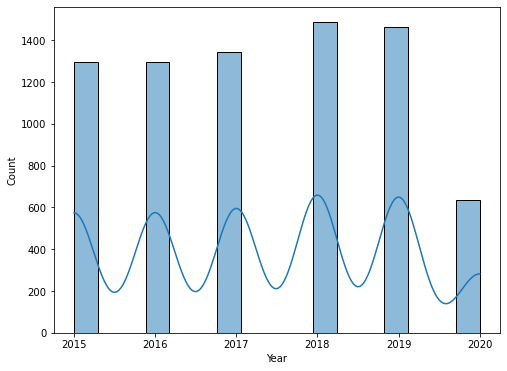

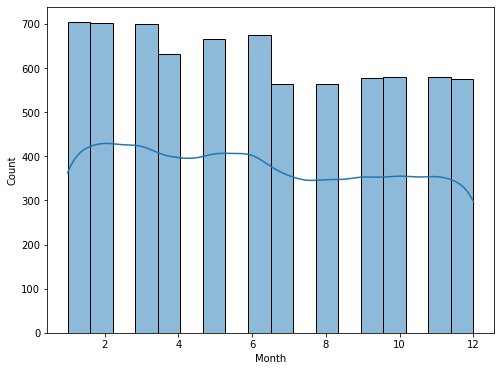

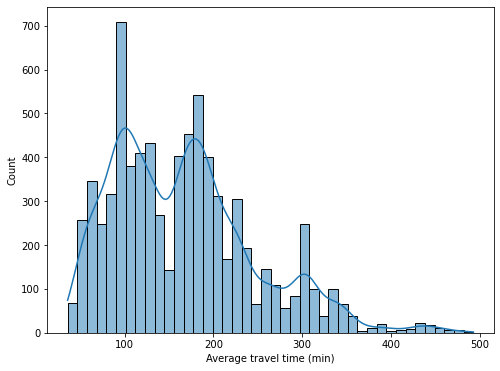

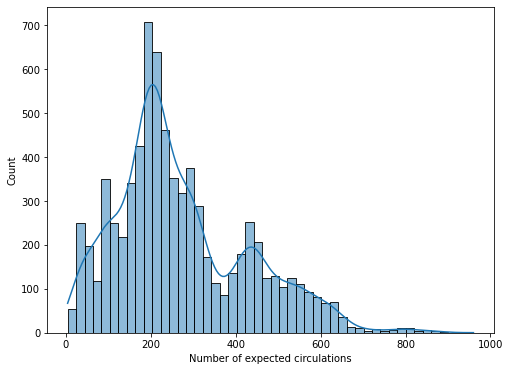

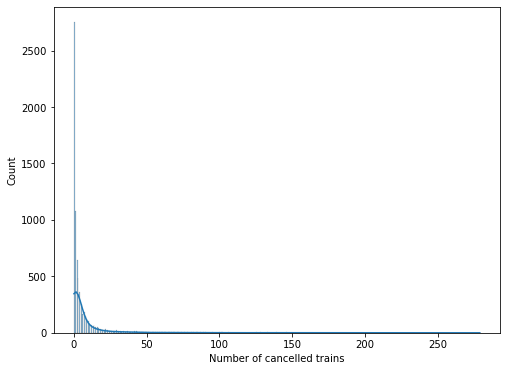

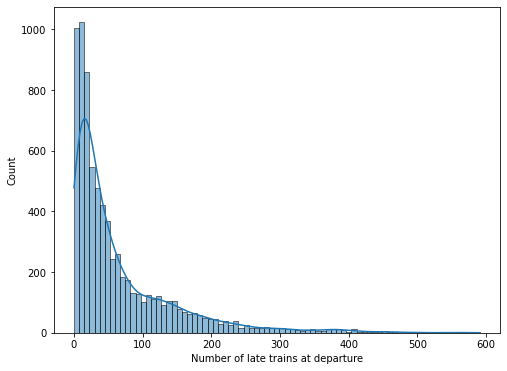

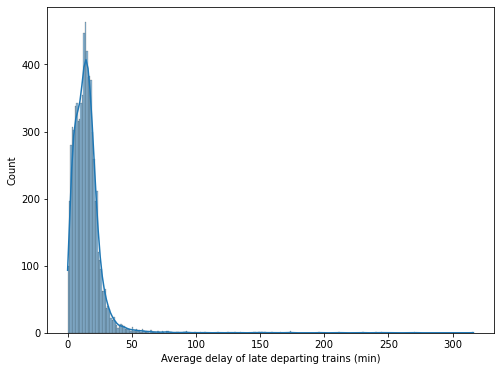

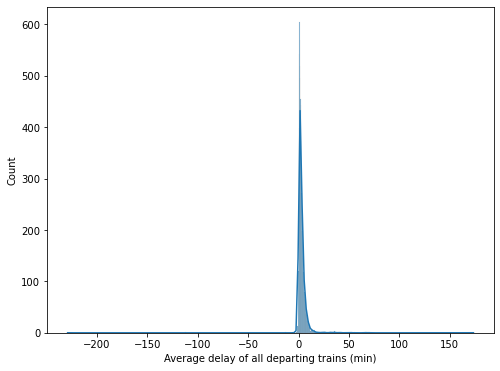

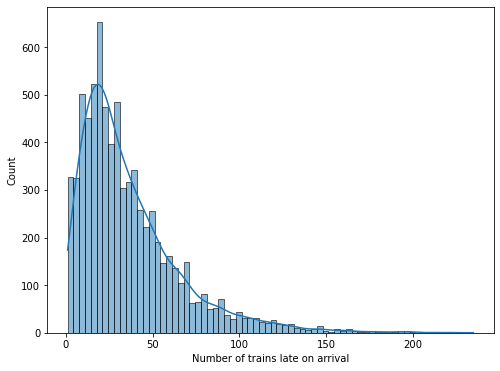

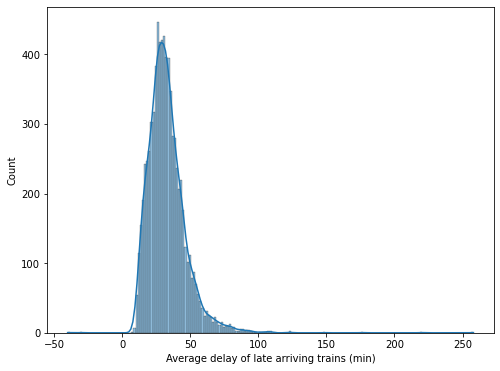

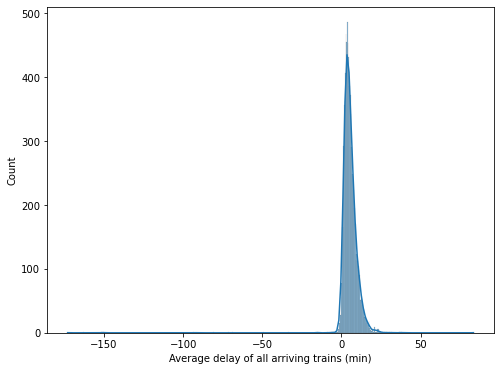

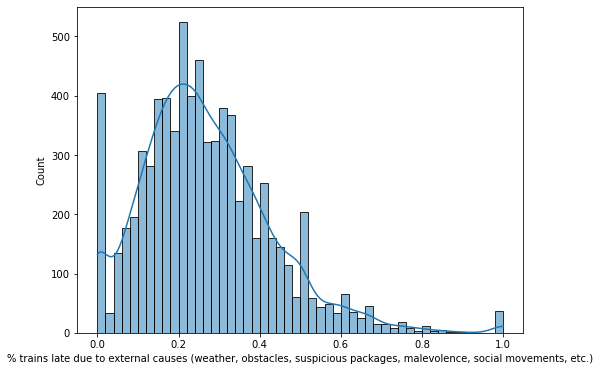

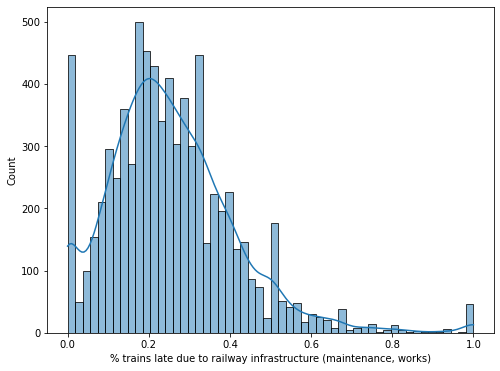

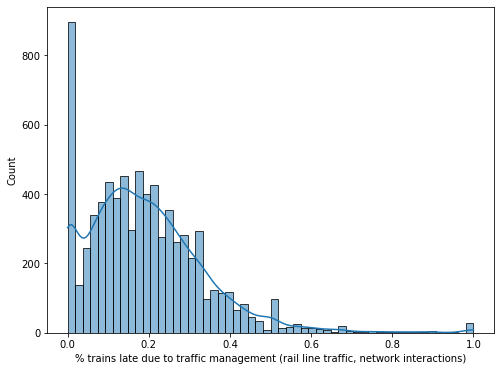

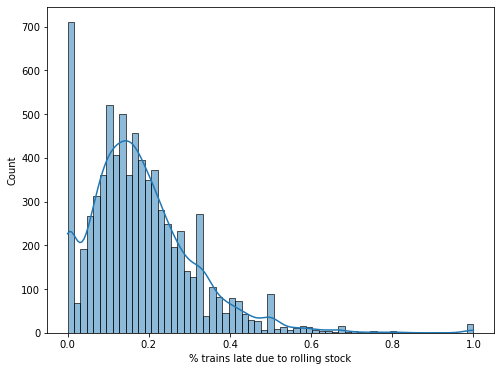

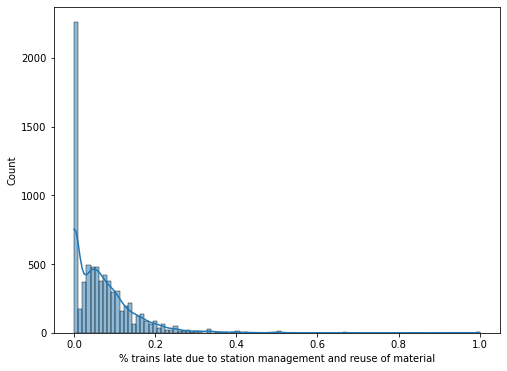

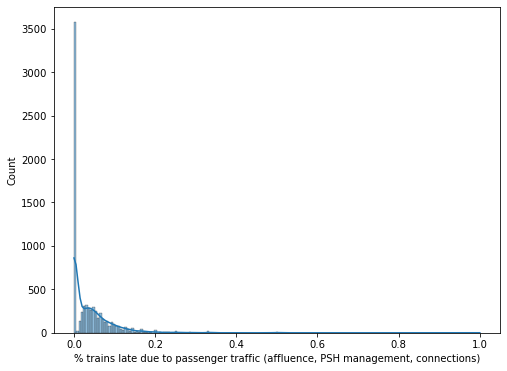

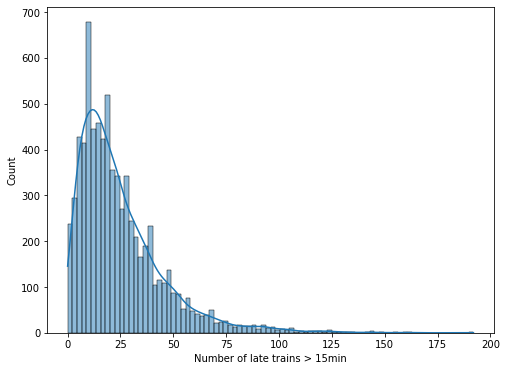

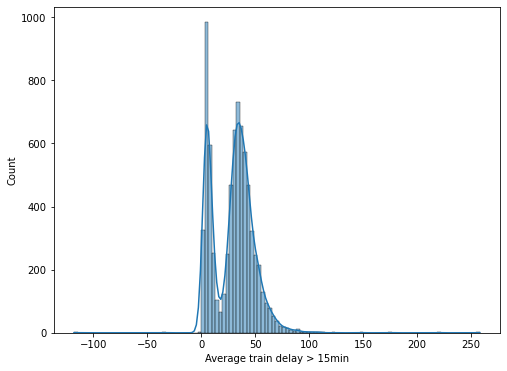

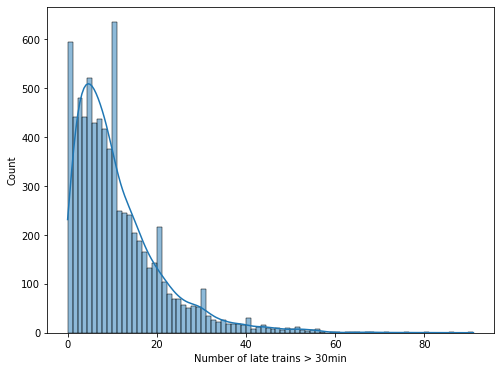

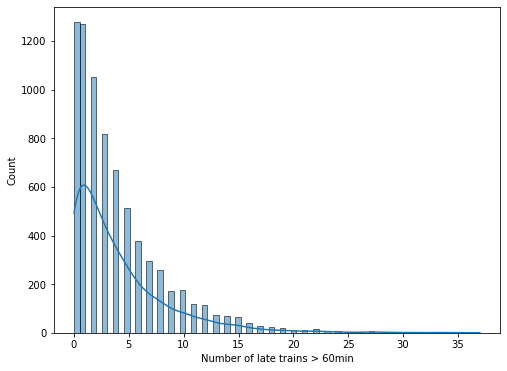

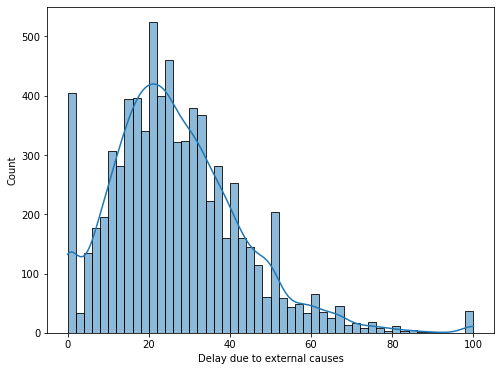

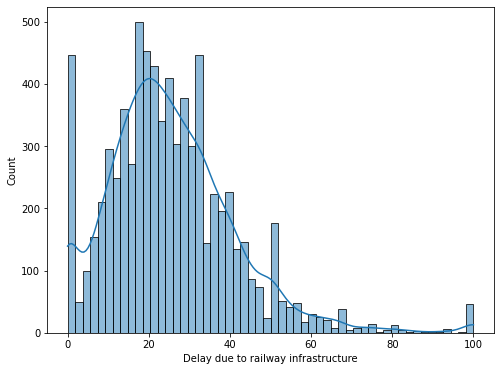

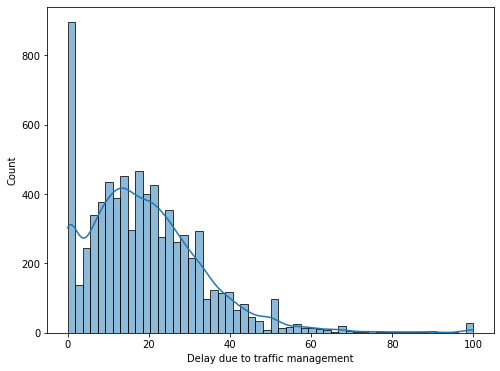

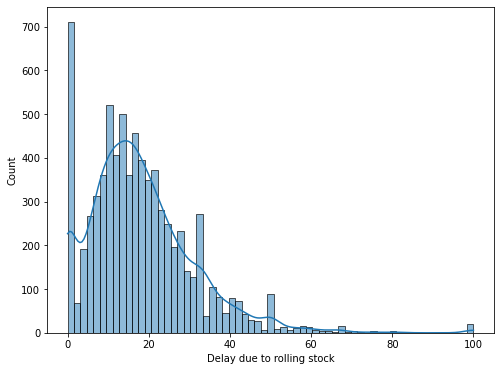

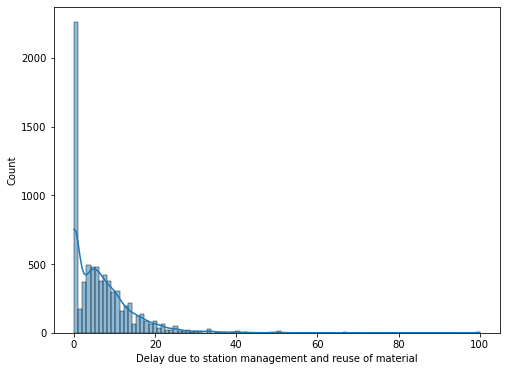

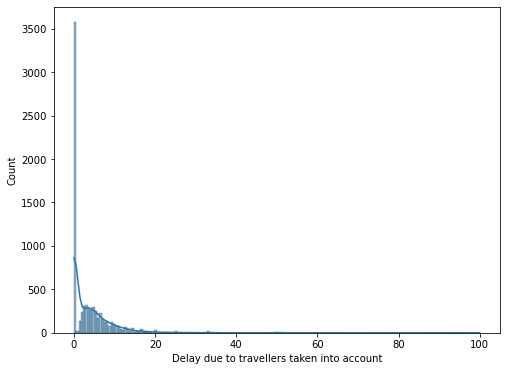

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

#Comparison of all numberical variable.

x=0
for i in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()

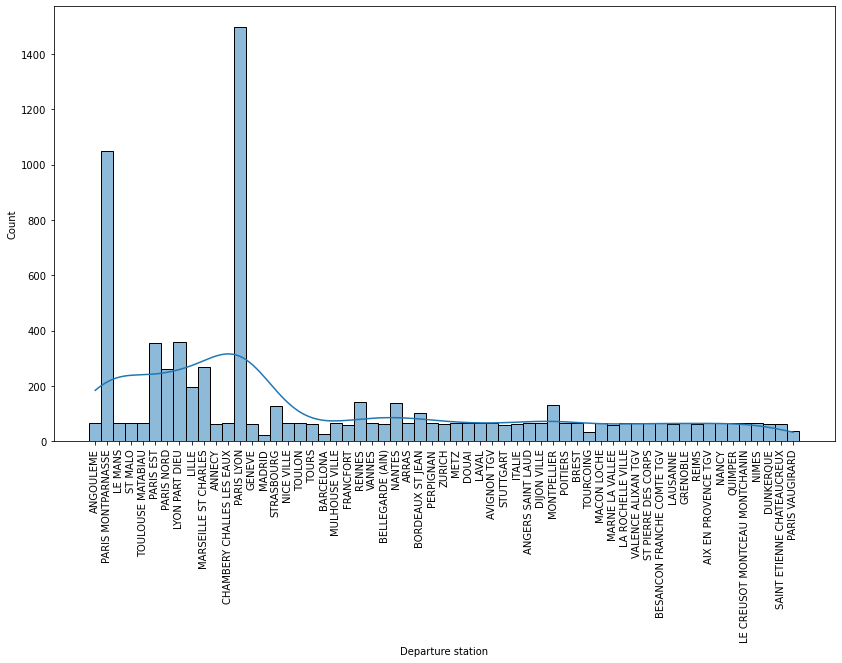

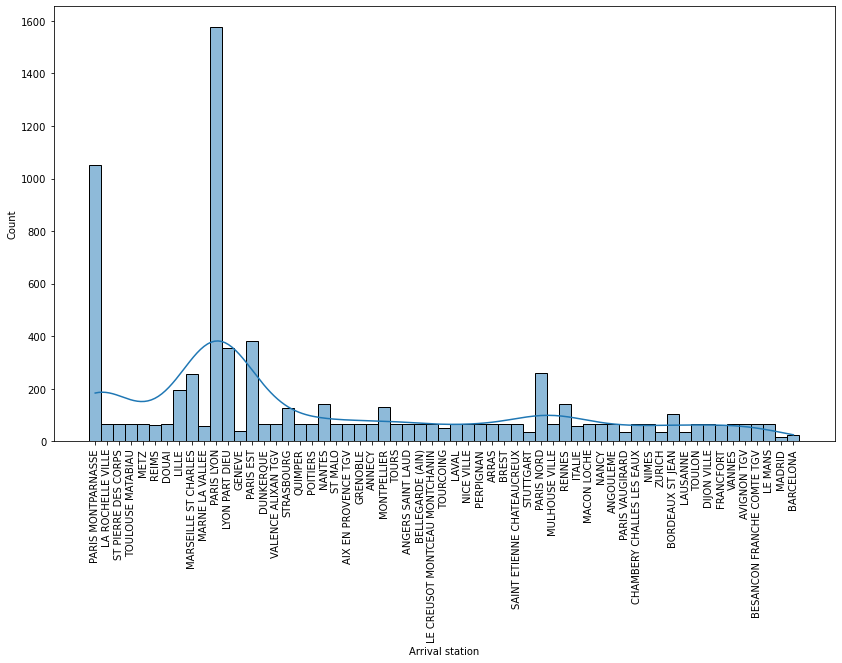

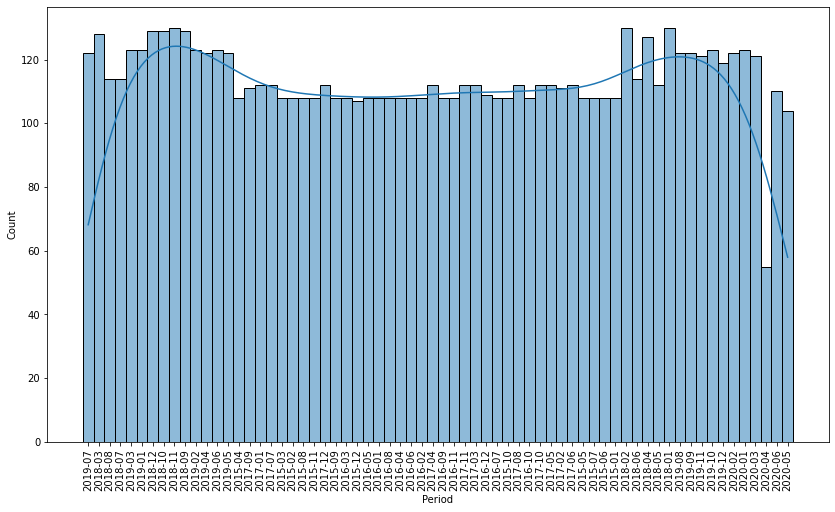

In [58]:
# Comparison of all categorical variable.
x=0
for i in categorical_columns:
    plt.figure(figsize=(14,8))
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.xticks(rotation=90)
    plt.show()

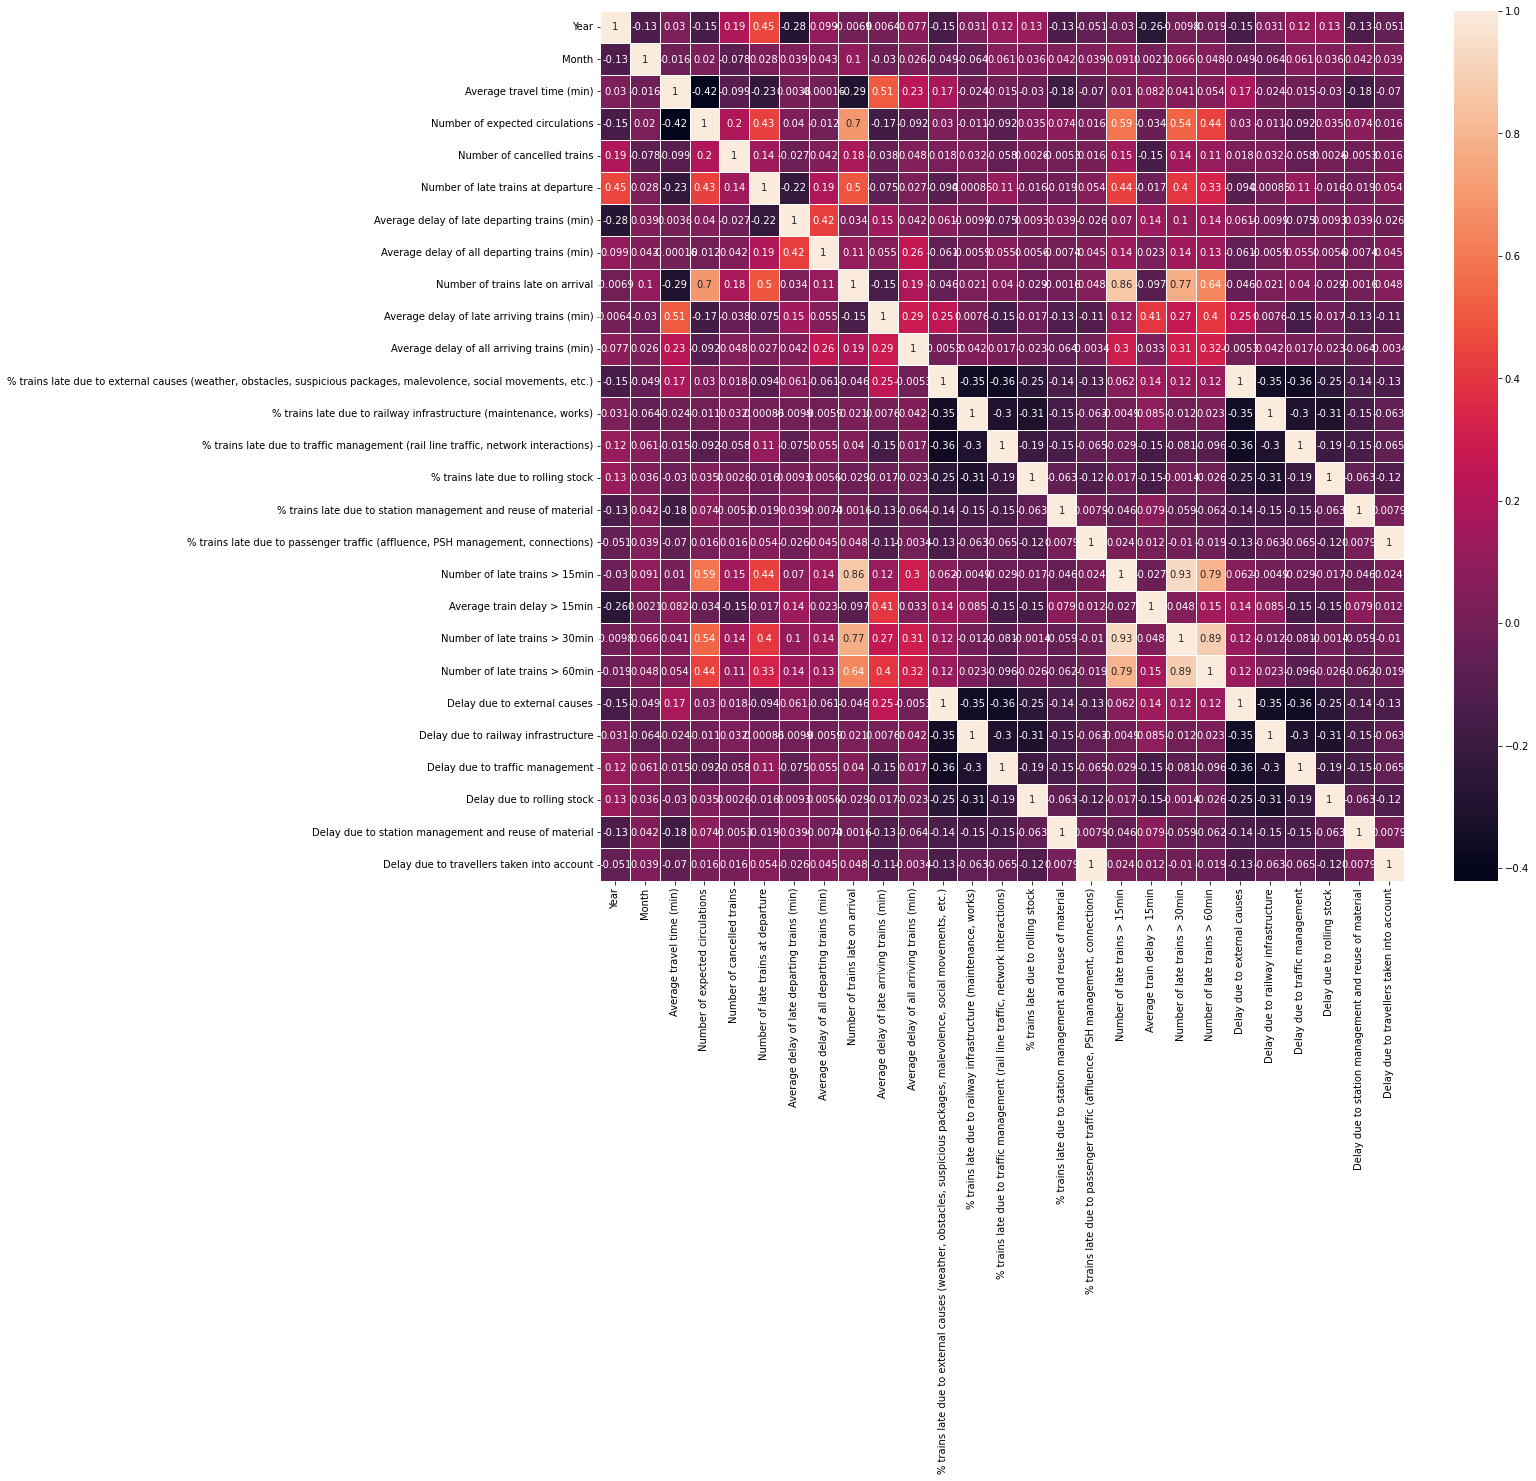

In [59]:
## correlation
plt.figure(figsize = (18,16))
sns.heatmap(data[numerical_columns].corr(),annot=True, linewidths=0.5)
plt.show()

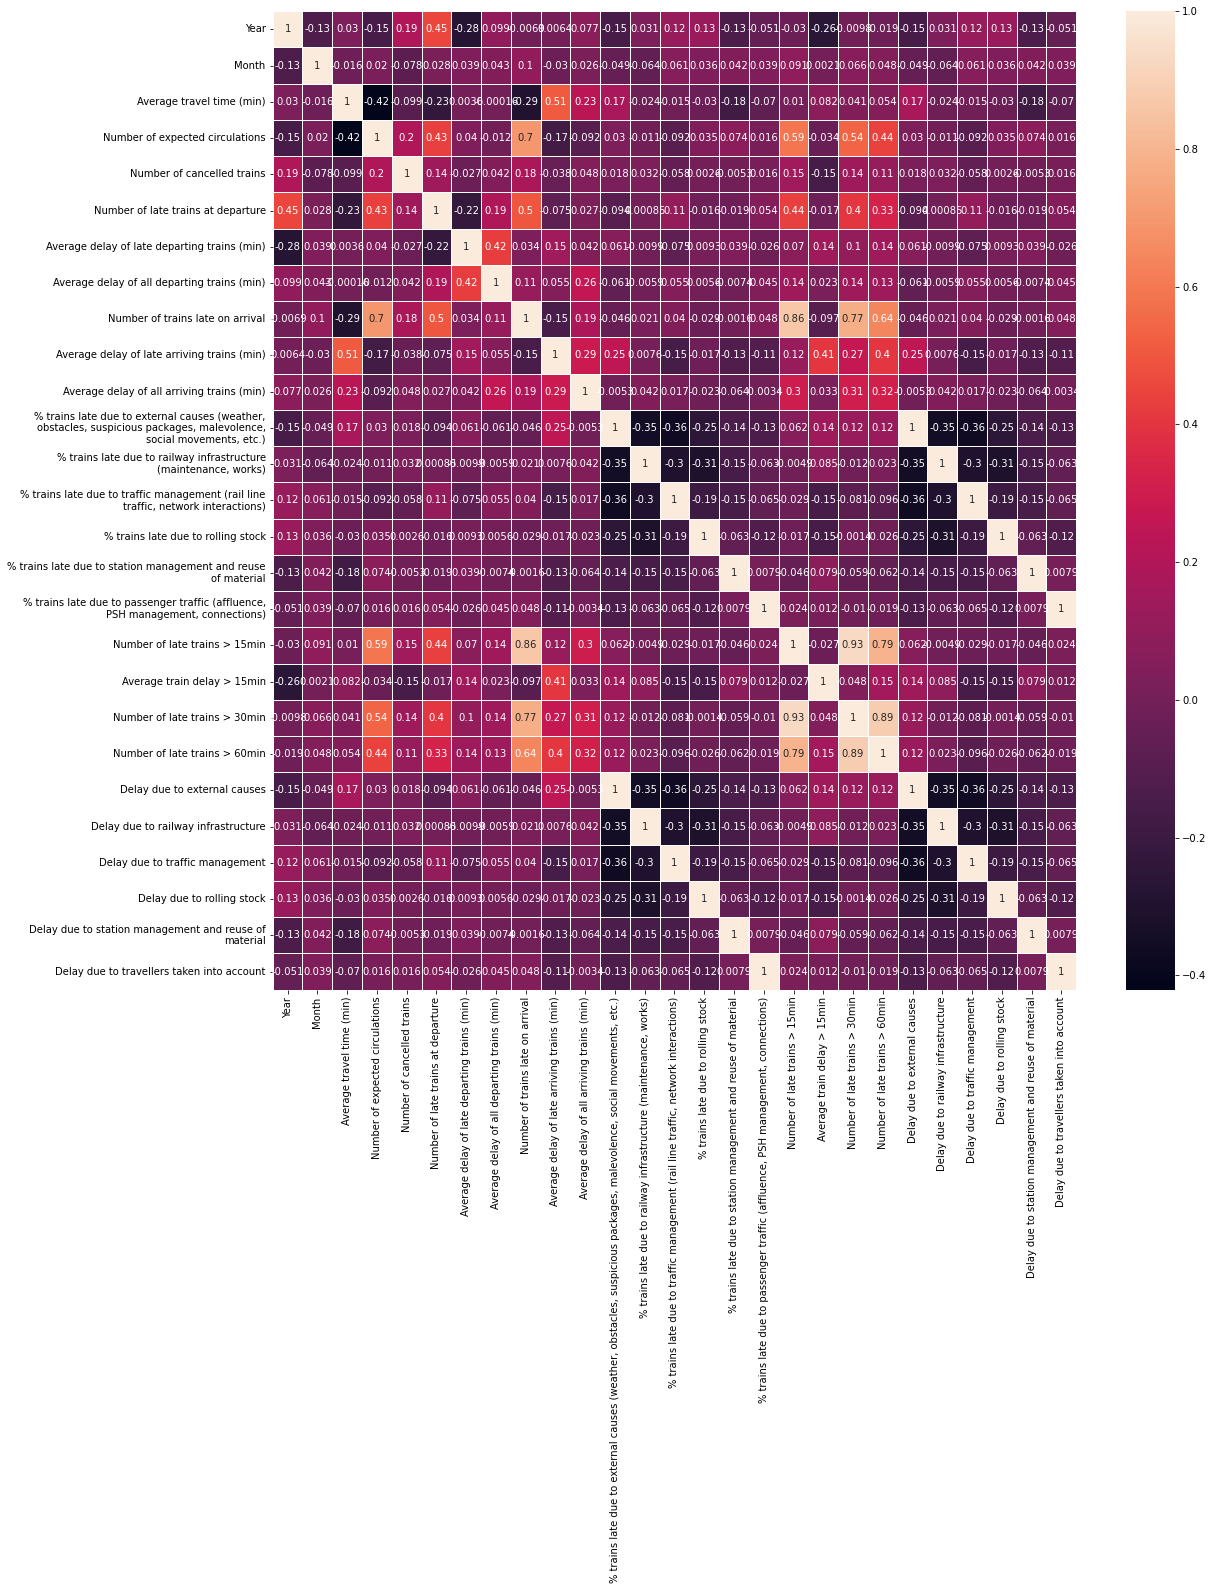

In [63]:
import textwrap

plt.figure(figsize=(18, 18))

# Create a heatmap
heatmap = sns.heatmap(data[numerical_columns].corr(), annot=True, linewidths=0.5)

# Get y-axis labels
yticklabels = heatmap.get_yticklabels()

# Wrap and set the wrapped labels back
heatmap.set_yticklabels([textwrap.fill(label.get_text(), width=50) for label in yticklabels])

plt.show()